In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import os
import sys
parent_dir = os.path.abspath(os.path.join('..'))
sys.path.append(parent_dir)
import _GradComp
import torch

In [8]:
# Folder containing your .pt result files
train_setting = "wd=0.0_lr=5e-5"
results_dir = f"./results/{train_setting}/GC/IF-RAW/Linear"  # Change to your actual path

methods = ["NA->Random-16*16", "NA->Random-32*32", "NA->Random-64*64", "NA->Localize-16*16", "NA->Localize-32*32", "NA->Localize-64*64", "NA->SJLT-16*16", "NA->SJLT-32*32", "NA->SJLT-64*64", "Random-32*32->Gaussian-16*16", "Random-64*64->Gaussian-32*32", "Random-128*128->Gaussian-64*64", "Localize-32*32->Gaussian-16*16", "Localize-64*64->Gaussian-32*32", "Localize-128*128->Gaussian-64*64", "NA->Gaussian-16*16", "NA->Gaussian-32*32", "NA->Gaussian-64*64"]
dims = ["$16\\times 16$", "$32\\times 32$", "$64\\times 64$"]

# Initialize dictionaries to store the results
lds_data = {method: [] for method in methods}
proj_time_data = {method: [] for method in methods}

# Load results from files
for method in methods:
    filename = f"{method}.pt"
    filepath = os.path.join(results_dir, filename)
    if os.path.exists(filepath):
        data = torch.load(filepath, weights_only=False)
        lds_data[method].append(data["lds"])
        proj_time = data["profile"].projection
        proj_time_data[method].append(proj_time)
        damping = data["best_damping"]
        print(f"Setting: {method}:\t damping {damping}\t lds {data['lds']:.4f}\t proj_time {proj_time:.4f}")
    else:
        print(f"Warning: {filepath} not found!")
        # Fill in with NaN or some placeholder
        lds_data[method].append(np.nan)
        proj_time_data[method].append(np.nan)

# Colors for methods
colors = {
    "Random": 'lightcoral',
    "Localize": 'limegreen',
    "SJLT": 'dodgerblue',
    "Gaussian": 'orange',
    "Rand-256*256_SJLT": 'lightcoral',
    "Rand-256*256_Gaussian": 'lightcoral',
    "Rand-512*512_SJLT": 'lightcoral',
    "Rand-512*512_Gaussian": 'lightcoral',
    "Loc-256*256_SJLT": 'limegreen',
    "Loc-256*256_Gaussian": 'limegreen',
    "Loc-512*512_SJLT": 'limegreen',
    "Loc-512*512_Gaussian": 'limegreen',
}

Setting: NA->Random-16*16:	 damping 0.1	 lds 0.1034	 proj_time 6.0658
Setting: NA->Random-32*32:	 damping 0.0001	 lds 0.1479	 proj_time 6.7354
Setting: NA->Random-64*64:	 damping 1.0	 lds 0.2391	 proj_time 6.7805
Setting: NA->Localize-16*16:	 damping 0.1	 lds 0.0997	 proj_time 7.8638
Setting: NA->Localize-32*32:	 damping 0.1	 lds 0.1617	 proj_time 6.6838
Setting: NA->Localize-64*64:	 damping 0.1	 lds 0.2267	 proj_time 6.1362
Setting: NA->SJLT-16*16:	 damping 0.1	 lds 0.1240	 proj_time 132.3511
Setting: NA->SJLT-32*32:	 damping 0.1	 lds 0.1897	 proj_time 133.4251
Setting: NA->SJLT-64*64:	 damping 0.1	 lds 0.2389	 proj_time 136.5163
Setting: NA->Gaussian-16*16:	 damping 0.0001	 lds 0.1188	 proj_time 24.0525
Setting: NA->Gaussian-32*32:	 damping 0.1	 lds 0.1818	 proj_time 21.3236
Setting: NA->Gaussian-64*64:	 damping 0.1	 lds 0.2338	 proj_time 22.2157


KeyError: 'Random'

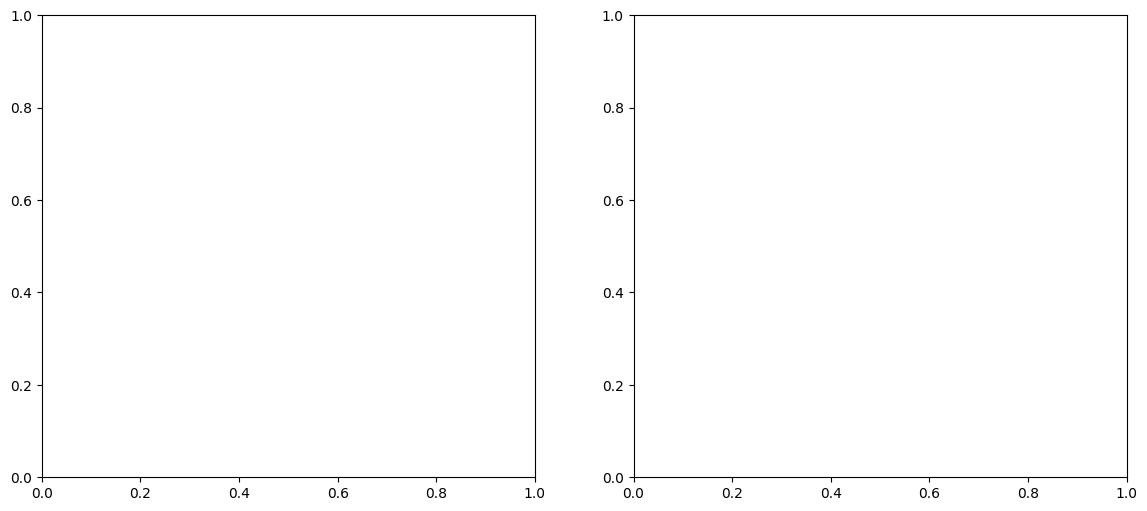

In [3]:
# Bar plot setup
x = np.arange(len(dims))  # one x location per projection dimension
width = 0.2  # Adjusted to fit 4 bars
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Calculate bar positions for 4 methods
pos1 = x - 1.5*width
pos2 = x - 0.5*width
pos3 = x + 0.5*width
pos4 = x + 1.5*width

# LDS subplot
axs[0].bar(pos1, lds_data["Random"], width, label="Random", color=colors["Random"])
axs[0].bar(pos2, lds_data["Localize"], width, label="Localize", color=colors["Localize"])
axs[0].bar(pos3, lds_data["SJLT"], width, label="SJLT", color=colors["SJLT"])
axs[0].bar(pos4, lds_data["Gaussian"], width, label="Gaussian", color=colors["Gaussian"])

# axs[0].set_title("LDS by Layer-wise Projection Dimension")
axs[0].set_xlabel("Layer-wise $k$", fontsize=24)
axs[0].set_ylabel("LDS", fontsize=24)
axs[0].set_xticks(x)
axs[0].set_xticklabels(dims)
axs[0].set_ylim(0, 0.27)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Projection Time subplot (Throughput)
axs[1].bar(pos1, proj_time_data["Random"], width, color=colors["Random"])
axs[1].bar(pos2, proj_time_data["Localize"], width, color=colors["Localize"])
axs[1].bar(pos3, proj_time_data["SJLT"], width, color=colors["SJLT"])
axs[1].bar(pos4, proj_time_data["Gaussian"], width, color=colors["Gaussian"])

# axs[1].set_title("Throughput by Layer-wise Projection Dimension")
axs[1].set_xlabel("Layer-wise $k$", fontsize=24)
axs[1].set_ylabel("Projection Time (s)", fontsize=24)
axs[1].set_xticks(x)
axs[1].set_xticklabels(dims)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

axs[0].tick_params(axis='x', labelsize=22)
axs[0].tick_params(axis='y', labelsize=22)
axs[1].tick_params(axis='x', labelsize=22)
axs[1].tick_params(axis='y', labelsize=22)

# Add shared legend
fig.legend(["Random", "Localize", "SJLT", "Gaussian"], loc='upper center', ncol=4, bbox_to_anchor=(0.5, 0.03), fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for legend
plt.savefig('../Figures/GPT2_wikitext.pdf', format='pdf', bbox_inches="tight")
plt.show()

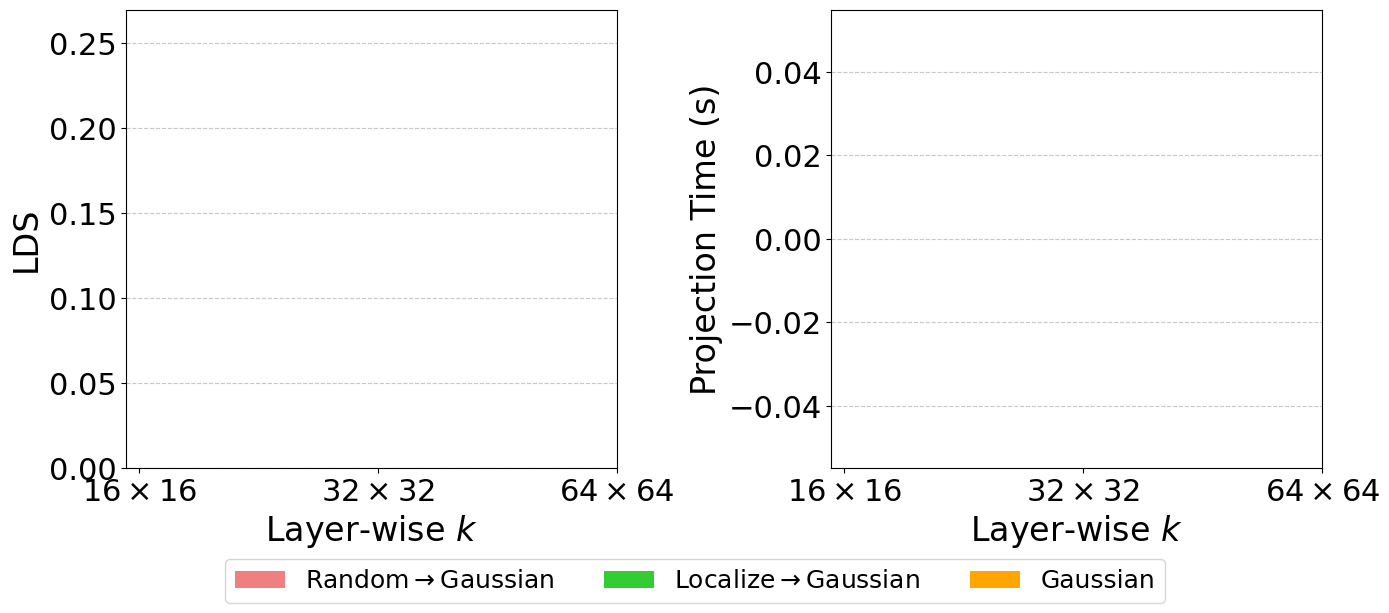

In [ ]:
# Bar plot setup
x = np.arange(len(dims))  # one x location per projection dimension
width = 0.25  # Adjusted to fit 3 bars

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Calculate bar positions for 3 methods
pos1 = x - width
pos2 = x
pos3 = x + width

# LDS subplot
axs[0].bar(pos1, lds_data["Rand-256*256_Gaussian"], width, label="Rand-256*256_Gaussian", color=colors["Rand-256*256_Gaussian"])
axs[0].bar(pos2, lds_data["Loc-256*256_Gaussian"], width, label="Loc-256*256_Gaussian", color=colors["Loc-256*256_Gaussian"])
axs[0].bar(pos3, lds_data["Gaussian"], width, label="Gaussian", color=colors["Gaussian"])
# axs[0].set_title("LDS by Projection Dimension")
axs[0].set_xlabel("Layer-wise $k$", fontsize=24)
axs[0].set_ylabel("LDS", fontsize=24)
axs[0].set_xticks(x)
axs[0].set_xticklabels(dims)
axs[0].set_ylim(0.0, 0.27)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Projection Time subplot
axs[1].bar(pos1, proj_time_data["Rand-256*256_Gaussian"], width, color=colors["Rand-256*256_Gaussian"])
axs[1].bar(pos2, proj_time_data["Loc-256*256_Gaussian"], width, color=colors["Loc-256*256_Gaussian"])
axs[1].bar(pos3, proj_time_data["Gaussian"], width, color=colors["Gaussian"])
# axs[1].set_title("Throughput by Layer-wise Projection Dimension")
axs[1].set_xlabel("Layer-wise $k$", fontsize=24)
axs[1].set_ylabel("Projection Time (s)", fontsize=24)
axs[1].set_xticks(x)
axs[1].set_xticklabels(dims)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

axs[0].tick_params(axis='x', labelsize=22)
axs[0].tick_params(axis='y', labelsize=22)
axs[1].tick_params(axis='x', labelsize=22)
axs[1].tick_params(axis='y', labelsize=22)

# Add shared legend
fig.legend(["Random$\\to$Gaussian", "Localize$\\to$Gaussian", "Gaussian"], loc='upper center', ncol=3, bbox_to_anchor=(0.5, 0.03), fontsize=18)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for legend
plt.savefig('../Figures/GPT2_wikitext_two-stage_256.pdf', format='pdf', bbox_inches="tight")
plt.show()

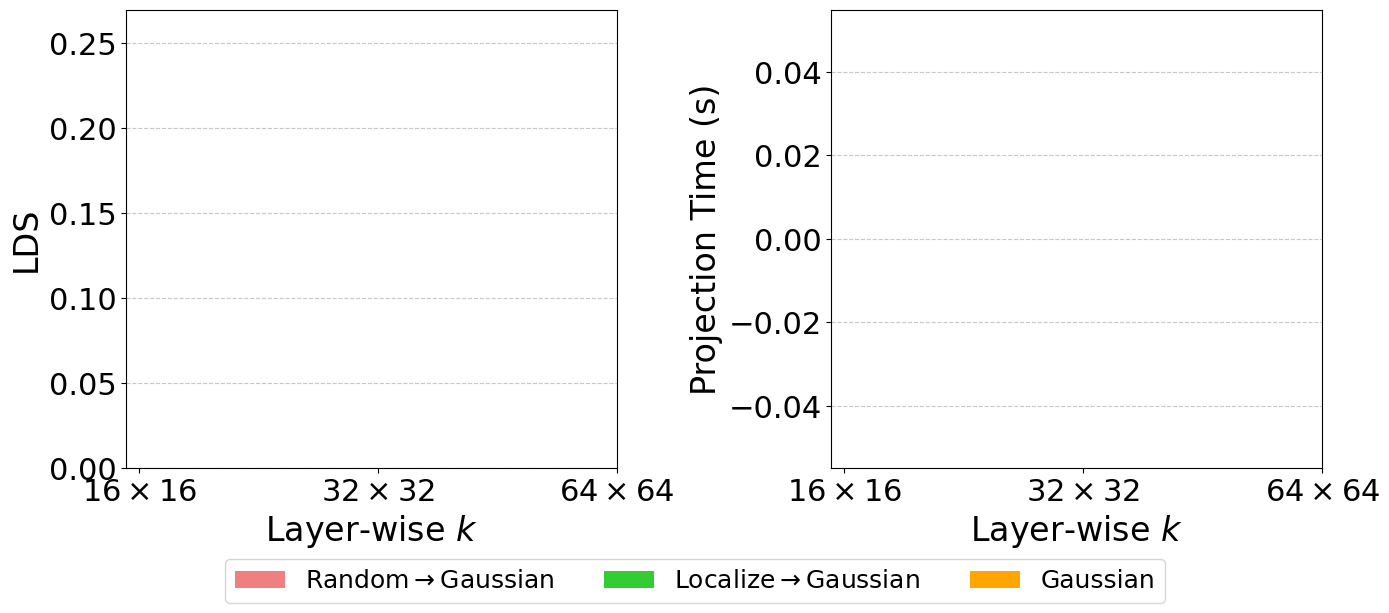

In [ ]:
# Bar plot setup
x = np.arange(len(dims))  # one x location per projection dimension
width = 0.25  # Adjusted to fit 3 bars

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Calculate bar positions for 3 methods
pos1 = x - width
pos2 = x
pos3 = x + width

# LDS subplot
axs[0].bar(pos1, lds_data["Rand-512*512_Gaussian"], width, label="Rand-512*512_Gaussian", color=colors["Rand-512*512_Gaussian"])
axs[0].bar(pos2, lds_data["Loc-512*512_Gaussian"], width, label="Loc-512*512_Gaussian", color=colors["Loc-512*512_Gaussian"])
axs[0].bar(pos3, lds_data["Gaussian"], width, label="Gaussian", color=colors["Gaussian"])
# axs[0].set_title("LDS by Projection Dimension")
axs[0].set_xlabel("Layer-wise $k$", fontsize=24)
axs[0].set_ylabel("LDS", fontsize=24)
axs[0].set_xticks(x)
axs[0].set_xticklabels(dims)
axs[0].set_ylim(0.0, 0.27)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Projection Time subplot
axs[1].bar(pos1, proj_time_data["Rand-512*512_Gaussian"], width, color=colors["Rand-512*512_Gaussian"])
axs[1].bar(pos2, proj_time_data["Loc-512*512_Gaussian"], width, color=colors["Loc-512*512_Gaussian"])
axs[1].bar(pos3, proj_time_data["Gaussian"], width, color=colors["Gaussian"])
# axs[1].set_title("Throughput by Layer-wise Projection Dimension")
axs[1].set_xlabel("Layer-wise $k$", fontsize=24)
axs[1].set_ylabel("Projection Time (s)", fontsize=24)
axs[1].set_xticks(x)
axs[1].set_xticklabels(dims)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

axs[0].tick_params(axis='x', labelsize=22)
axs[0].tick_params(axis='y', labelsize=22)
axs[1].tick_params(axis='x', labelsize=22)
axs[1].tick_params(axis='y', labelsize=22)

# Add shared legend
fig.legend(["Random$\\to$Gaussian", "Localize$\\to$Gaussian", "Gaussian"], loc='upper center', ncol=3, bbox_to_anchor=(0.5, 0.03), fontsize=18)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for legend
plt.savefig('../Figures/GPT2_wikitext_two-stage_512.pdf', format='pdf', bbox_inches="tight")
plt.show()